In [1]:

import os,sys,glob
# Move two levels up work from project level, not location of analysis file
os.chdir('../..')
print(os.getcwd())
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import Functions.globalFunctions.ExtracellularField as EcF
from matplotlib import cm
from typing import Literal
from scipy import integrate
import ipympl
import time
#import warnings
from Analyses.SDC.tools import *
from Analyses.SDC import loader
#warnings.filterwarnings('error',category=UserWarning)

%matplotlib inline
recollect = False
fill_missing_xyzpositions = False
consider_fill = True


d:\Users\rschoete\Documents\Optogenetics\OptogeneticExcitability\Code


In [2]:
#Load data
filepath = './Results/SDC/SDC_CA1PCcACsig5_invivoUgent'


# list parameters of interest
positional_input = ['x','y','z','phi','theta','psi']
cell_init_options = ['phi_0','theta_0','psi_0']
settings_options = ['seed','celsius','dt']
opsin_options = ['Gmax','distribution','opsinmech','distribution_method','opsinlocations']
field_options = ['field','dc','nPulse','prf']
result = ['amp','dur']
all_columns = result+field_options+opsin_options+cell_init_options+positional_input+settings_options

# opsinlocations to single word
opsinLocation_map = loader.opsinLocation_map
master_df = loader.load_data_df(filepath = filepath, filename = 'all_data_filled.csv', recollect = recollect, result = result, all_columns = all_columns, positional_input = positional_input, cell_init_options  = cell_init_options, settings_options  = settings_options, opsin_options = opsin_options, field_options = field_options, fill_missing_xyzpositions = True, save_recollect = True, savename = None)

unique_values_columns_master = {key: master_df[key].unique() for key in all_columns}
master_df.head()


,amp,dur,field,dc,nPulse,prf,Gmax,distribution,opsinmech,distribution_method,...,x,y,z,phi,theta,psi,seed,celsius,dt,settings_str
0,69062.5000,0.01,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,0.0,0,-1.570796,0,1.638360e+09,34,0.025,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
1,1856.0547,0.10,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,0.0,0,-1.570796,0,1.638360e+09,34,0.025,0.1_0_-1.5707963267948966_0_1638360000.0_34_0....
2,237.8070,1.00,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,0.0,0,-1.570796,0,1.638360e+09,34,0.025,1.0_0_-1.5707963267948966_0_1638360000.0_34_0....
3,94.0081,10.00,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,0.0,0,-1.570796,0,1.638360e+09,34,0.025,10.0_0_-1.5707963267948966_0_1638360000.0_34_0...
4,72.1953,100.00,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,0.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...


In [3]:
#test selector
myselection = {key:unique_values_columns_master[key][0] for key in [*cell_init_options,*settings_options,*opsin_options,*field_options]}
myselection['dur'] = 100
intm_df = master_df[selection_generator(master_df,unique_values_columns_master,verbose=False,**myselection)].reset_index(drop=True)
intm_df.head(len(intm_df))


,amp,dur,field,dc,nPulse,prf,Gmax,distribution,opsinmech,distribution_method,...,x,y,z,phi,theta,psi,seed,celsius,dt,settings_str
0,7.219530e+01,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,0.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
1,1.678781e+02,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,500.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
2,1.630354e+03,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,1000.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
3,8.034311e+03,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,1500.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
4,2.758548e+04,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,2000.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.928611e+05,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,1800.0,2500.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
96,5.623102e+05,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,1800.0,3000.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
97,1.146060e+06,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,1800.0,3500.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...
98,2.450874e+06,100.0,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,1800.0,4000.0,0,-1.570796,0,1.638360e+09,34,0.025,100.0_0_-1.5707963267948966_0_1638360000.0_34_...


{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed': 1638360000.0, 'celsius': 34, 'dt': 0.025, 'Gmax': 2.1607680884889966, 'distribution': 'distribution = lambda x: 10.0', 'opsinmech': 'chr2h134r', 'distribution_method': '3d', 'opsinlocations': 'allsec', 'field': 'Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10', 'dc': 1.0, 'nPulse': 1, 'prf': 0.1}



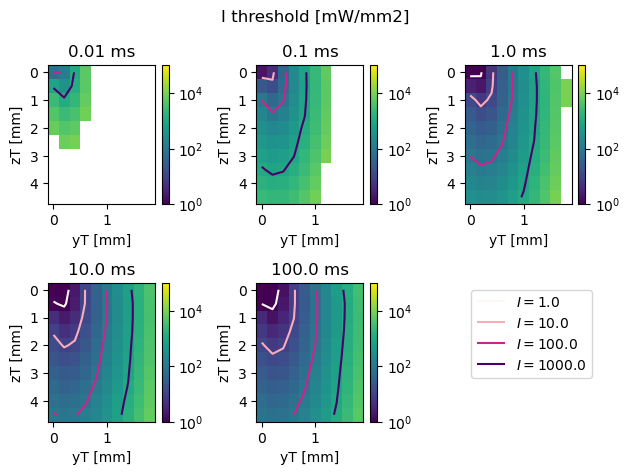

In [4]:
myselection = {key:unique_values_columns_master[key][0] for key in [*cell_init_options,*settings_options,*opsin_options,*field_options]}
single_config_df = master_df[selection_generator(master_df,unique_values_columns_master,verbose=False,**myselection)].reset_index(drop=True)
print(myselection)

Imin = np.min(single_config_df['amp'])
Imax = 1e5#np.max(single_config_df['amp'])
levels = np.logspace(0,3,4)
norm_log = cm.colors.LogNorm(vmax=Imax, vmin=1)
norm_log_cntr = cm.colors.LogNorm(vmax=levels[-1], vmin=levels[0])


udurs = list(single_config_df['dur'].unique())
fig,axs = plt.subplots(int(len(udurs)/3+0.5),3,tight_layout = True)

for dur,ax in zip(udurs,axs.ravel()):
    intm_df = single_config_df[single_config_df['dur']==dur]
    data_toplot = EcF.prepareDataforInterp(np.array((intm_df['y'],intm_df['z'],intm_df['amp'])).T/1000,'ninterp')
    yY, zZ = np.meshgrid(np.linspace(data_toplot[0].min(),data_toplot[0].max(),len(np.unique(data_toplot[0])),endpoint=True),np.linspace(data_toplot[1].min(),data_toplot[1].max(),len(np.unique(data_toplot[0])),endpoint=True))

    im,cntr,cb = EcF.slicePlot(data_toplot,ax,fig,plotGrid=(yY,zZ),structured=True, norm=norm_log,invert_yaxis=True,contour_kwargs={'norm':norm_log_cntr,'cmap':'RdPu','levels':levels})
    ax.set_xlabel('yT [mm]')
    ax.set_ylabel('zT [mm]')
    ax.set_title(f'{dur} ms')
fig.suptitle('I threshold [mW/mm2]')
h, l = cntr.legend_elements("I")
axs[-1,-1].legend(h, l,ncol=1,loc='upper center')
axs[-1,-1].axis('off')
print()

2.1607680884889966
{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed': 1638360000.0, 'celsius': 34, 'dt': 0.025, 'opsinmech': 'chr2h134r', 'distribution_method': '3d', 'opsinlocations': 'allsec', 'field': 'Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10', 'dc': 1.0, 'nPulse': 1, 'prf': 0.1, 'Gmax': 2.1607680884889966}

6.832948655033484
{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed': 1638360000.0, 'celsius': 34, 'dt': 0.025, 'opsinmech': 'chr2h134r', 'distribution_method': '3d', 'opsinlocations': 'allsec', 'field': 'Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10', 'dc': 1.0, 'nPulse': 1, 'prf': 0.1, 'Gmax': 6.832948655033484}

21.607680884889987
{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed': 1638360000.0, 'celsius': 34, 'dt': 0.025, 'opsinmech': 'chr2h134r', 'distribution_method': '3d', 'opsinlocations': 'allsec', 'field': 'Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10', 'dc': 1.0, 'nPulse': 1, 'prf': 0.1, 'Gmax': 21.607680884889987}

68.32948655033485


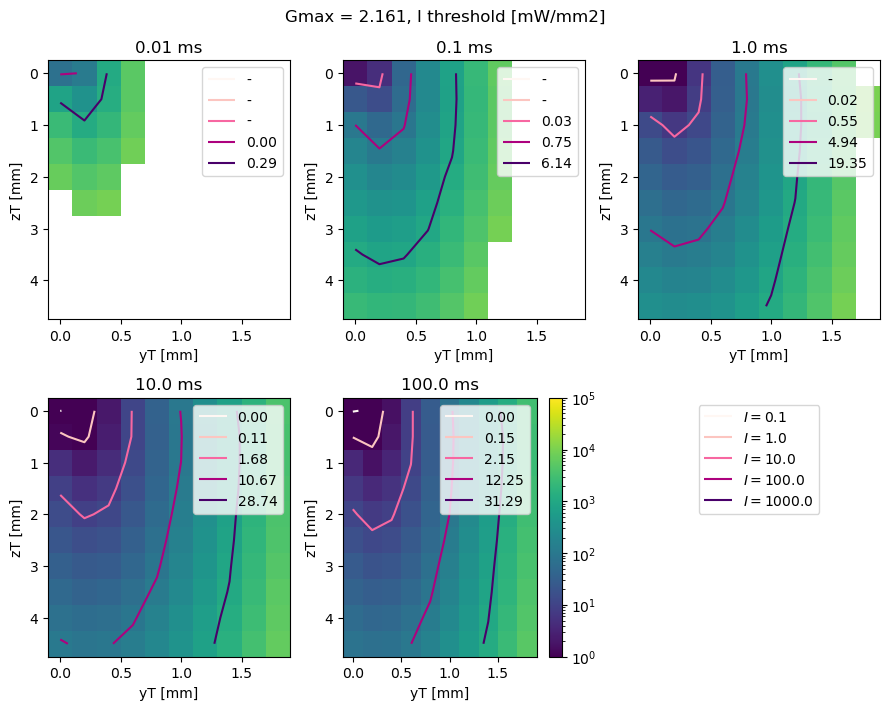

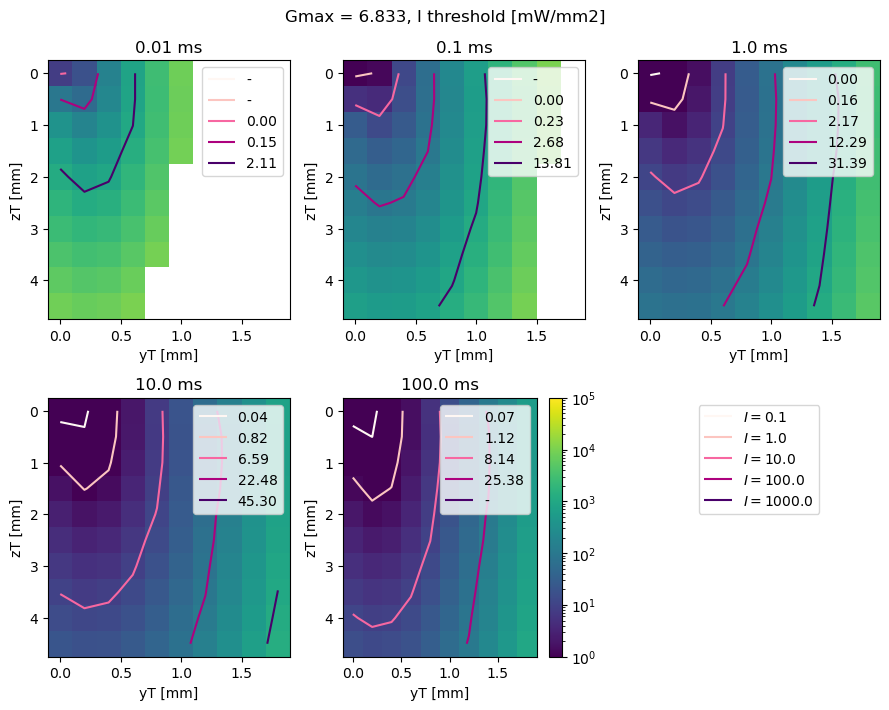

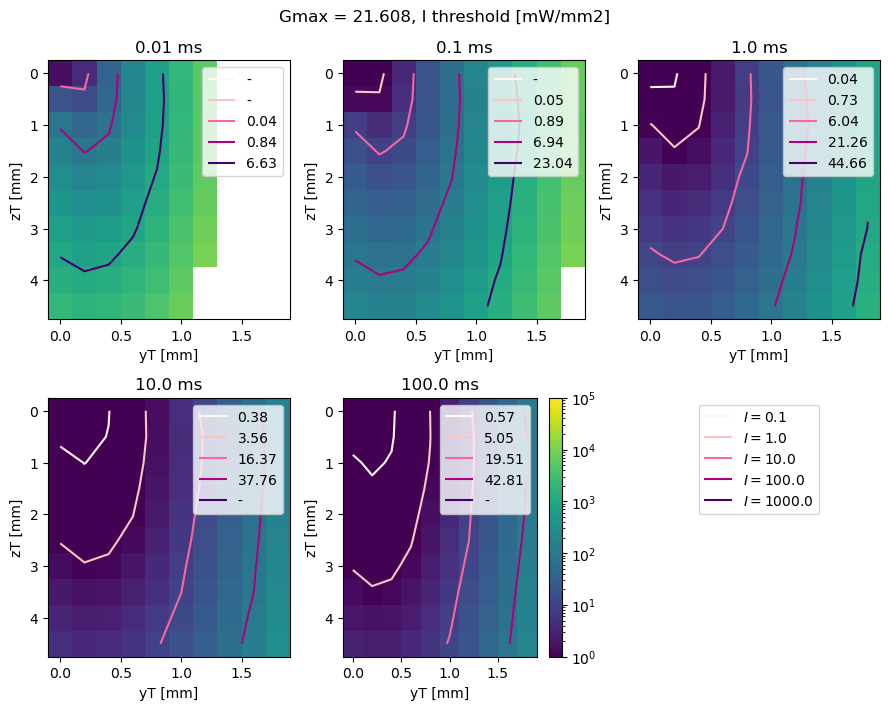

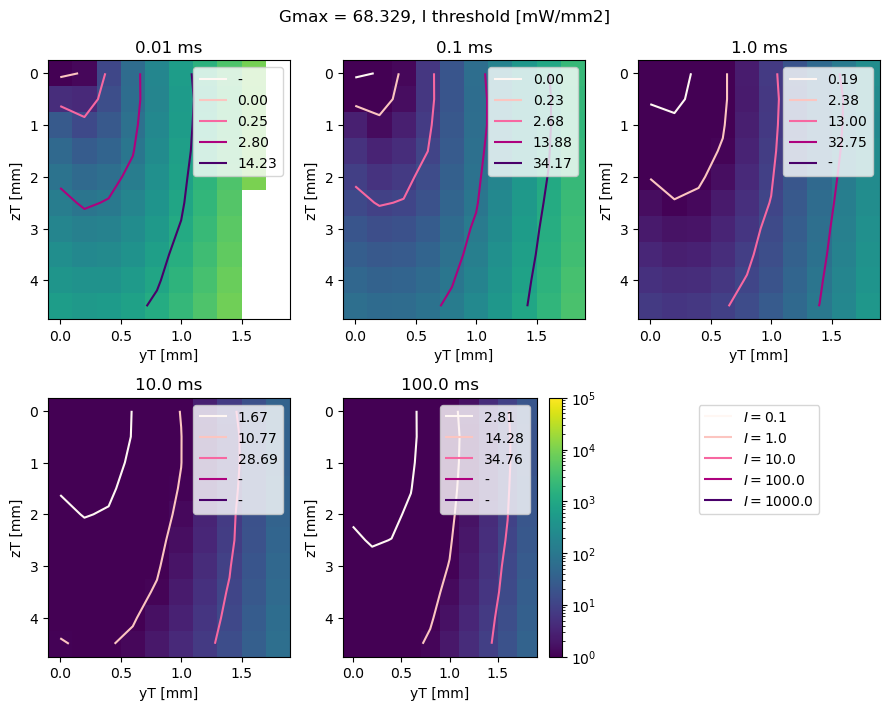

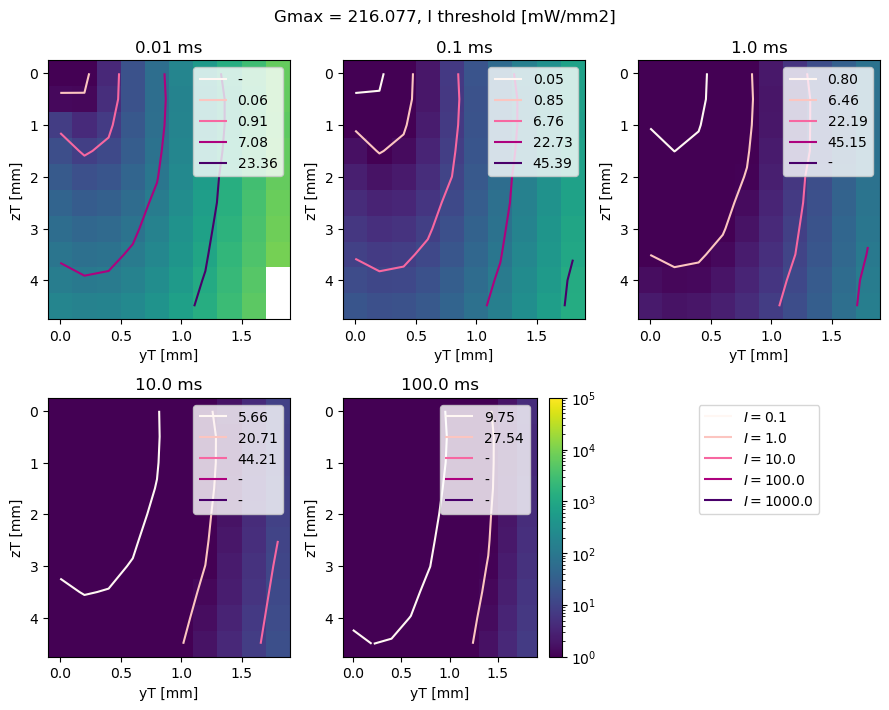

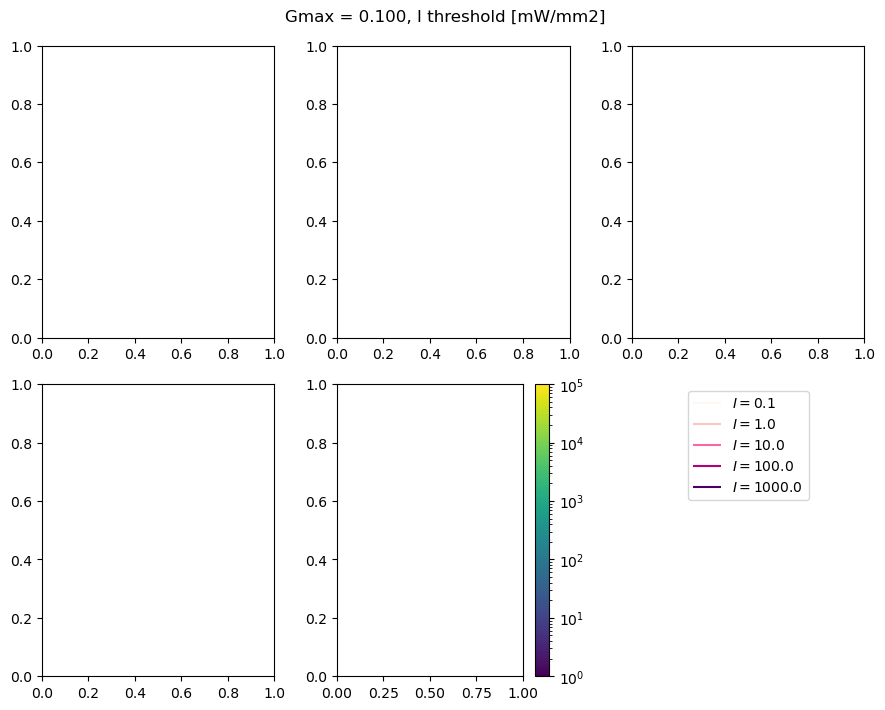

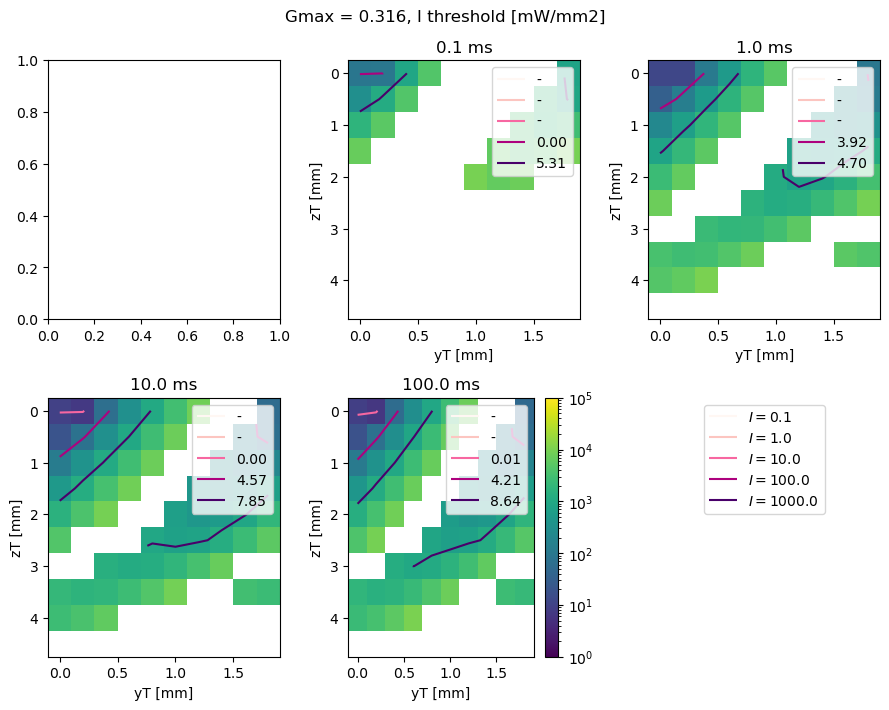

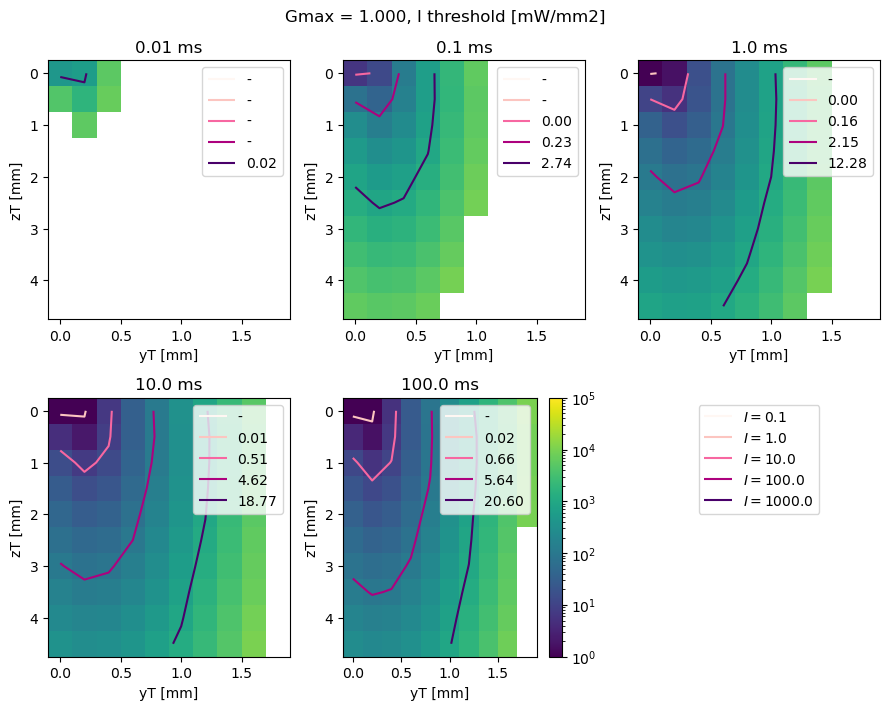

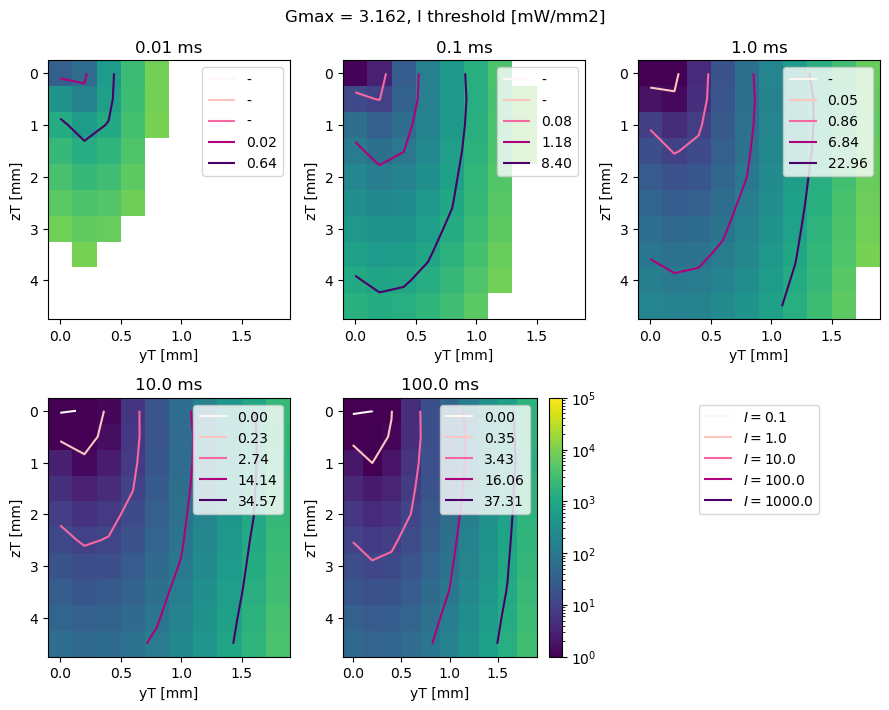

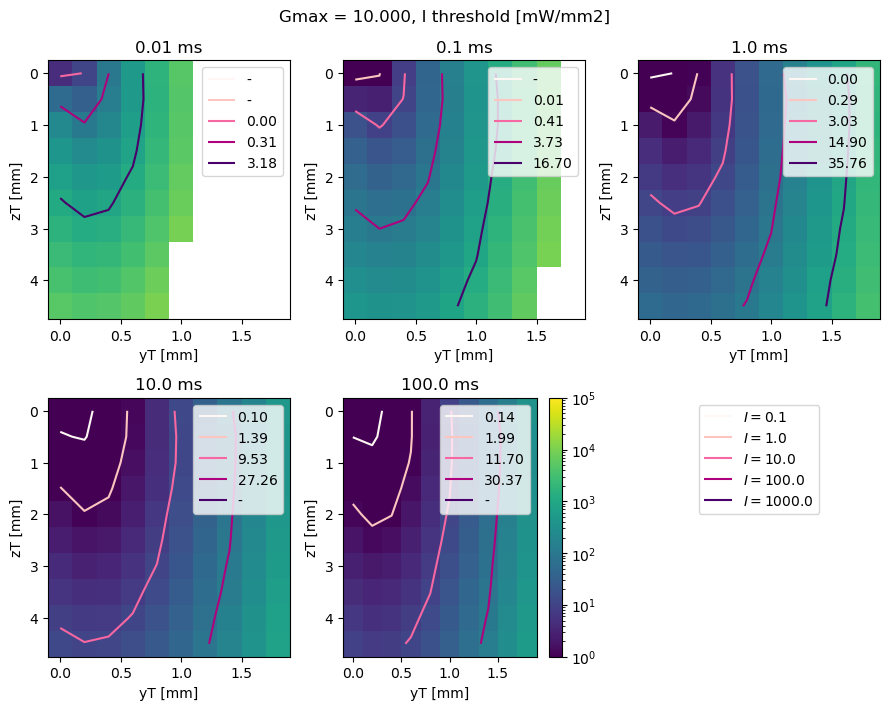

In [5]:
myselection_noGmax = {key:unique_values_columns_master[key][0] for key in [*cell_init_options,*settings_options,*opsin_options,*field_options] if not key in ['Gmax','distribution']}
intm_df = master_df[selection_generator(master_df,unique_values_columns_master,verbose=False,**myselection_noGmax)]
gmaxs = list(intm_df['Gmax'].unique())
print_upscale = False
nan_tolerance_percentage = 0.95

for gmax in gmaxs:
    print(gmax)
    myselection = {**myselection_noGmax, 'Gmax': gmax}
    single_config_df = master_df[selection_generator(master_df,unique_values_columns_master,verbose=False,**myselection)].reset_index(drop=True)
    print(myselection)

    Imin = np.min(single_config_df['amp'])
    Imax = 1e5#np.max(single_config_df['amp'])
    levels = np.logspace(-1,3,5)
    norm_log = cm.colors.LogNorm(vmax=Imax, vmin=1)
    norm_log_cntr = cm.colors.LogNorm(vmax=levels[-1], vmin=levels[0])


    udurs = list(single_config_df['dur'].unique())
    fig,axs = plt.subplots(int(len(udurs)/3+0.67),3,tight_layout = True,figsize=np.array([10,8])*0.9)
    all_axs = axs.ravel()
    if print_upscale:
        fig_up,axs_up = plt.subplots(int(len(udurs)/3+0.67),3,tight_layout = True,figsize=np.array([10,8])*0.9)
        all_axs = zip(axs.ravel(),axs_up.ravel())

    for dur,ax in zip(udurs,all_axs):
        if print_upscale:
            ax_up = ax[1]
            ax = ax[0]

        intm_df = single_config_df[single_config_df['dur']==dur]
        if not np.all(np.isnan(intm_df['amp'])):
            data_toplot = EcF.prepareDataforInterp(np.array((intm_df['y'],intm_df['z'],intm_df['amp'])).T/1000,'ninterp')
            yY, zZ = np.meshgrid(np.linspace(data_toplot[0].min(),data_toplot[0].max(),len(np.unique(data_toplot[0])),endpoint=True),np.linspace(data_toplot[1].min(),data_toplot[1].max(),len(np.unique(data_toplot[0])),endpoint=True))
            
            if sum(np.isnan(data_toplot[-1].flatten()))/len(data_toplot[-1].flatten()) < nan_tolerance_percentage:
                im,cntr,cb = EcF.slicePlot(data_toplot,ax,fig,plotGrid=(yY,zZ),structured=True, norm=norm_log,invert_yaxis=True,contour_kwargs={'norm':norm_log_cntr,'cmap':'RdPu','levels':levels})
                ax.set_xlabel('yT [mm]')
                ax.set_ylabel('zT [mm]')
                ax.set_title(f'{dur} ms')
                cb.remove()
                h, l = cntr.legend_elements("I")
                vta = VTA2D(yY,zZ,im.get_array().reshape(yY.shape),grid_order=EcF.checkGridOrder(yY.ravel(),zZ.ravel()),cntrs=cntr,cntr_order='rz',intensity = levels)
                ax.legend(h, [f'{x:0.2f}' if ~np.isnan(x) else '-' for x in vta],ncol=1,loc='upper right')

                if print_upscale:
                    yY_up, zZ_up = np.meshgrid(np.linspace(data_toplot[0].min(),data_toplot[0].max(),30,endpoint=True),np.linspace(data_toplot[1].min(),data_toplot[1].max(),30,endpoint=True))
                    im_up,cntr_up,cb_up = EcF.slicePlot(data_toplot,ax_up,fig_up,plotGrid=(yY_up,zZ_up),structured=True, norm=norm_log,invert_yaxis=True,contour_kwargs={'norm':norm_log_cntr,'cmap':'RdPu','levels':levels})
                    ax_up.set_xlabel('yT [mm]')
                    ax_up.set_ylabel('zT [mm]')
                    ax_up.set_title(f'{dur} ms')
                    cb_up.remove()
                    h_up, l_up = cntr_up.legend_elements("I")
                    #print('\nvta')
                    #print(EcF.checkGridOrder(yY.ravel(),zZ.ravel()))
                    vta_up = VTA2D(yY_up,zZ_up,im_up.get_array().reshape(yY_up.shape),grid_order=EcF.checkGridOrder(yY_up.ravel(),zZ_up.ravel()),cntrs=cntr_up,cntr_order='rz',intensity = levels)
                    ax_up.legend(h_up, [f'{x:0.2f}' if ~np.isnan(x) else '-' for x in vta_up],ncol=1,loc='upper right')
                    #print('\nvta2')
                    #print(EcF.checkGridOrder(yY.T.ravel(),zZ.T.ravel()))
                    #vta2 = VTA2D(yY.T,zZ.T,im.get_array().reshape(yY.shape).T,grid_order=EcF.checkGridOrder(yY.T.ravel(),zZ.T.ravel()),intensity = levels,close_plot=False)
                    #if np.any((np.array(vta)-np.array(vta2))>1e-10):
                    #    print(np.array(vta)-np.array(vta2))

    fig.suptitle(f'Gmax = {gmax:0.3f}, I threshold [mW/mm2]')
    h, l = cntr.legend_elements("I")
    axs[-1,-1].legend(h, l,ncol=1,loc='upper center')
    axs[-1,-1].axis('off')
    cb = fig.colorbar(im,ax=axs[-1,-2])
    if print_upscale:
        fig_up.suptitle(f'Upscaled via linear interpol')
        h_up, l_up = cntr_up.legend_elements("I")
        axs_up[-1,-1].legend(h_up, l_up,ncol=1,loc='upper center')
        axs_up[-1,-1].axis('off')
        cb_up = fig_up.colorbar(im_up,ax=axs_up[-1,-2])
    print()

In [6]:
usettings_str = list(master_df['settings_str'].unique())[:1]

for uset in usettings_str:
    intm_df = master_df[master_df['settings_str']==uset]
    X = np.array(intm_df['x'])/1000; Y = np.array(intm_df['y'])/1000; Z = np.array(intm_df['z'])/1000
    uX = np.unique(X); uY = np.unique(Y); uZ = np.unique(Z)
    data = np.array(intm_df['amp'])/1000

    order = EcF.checkGridOrder(Y,Z)
    print(order)
    if order == 'xy':
        n_row = len(uZ)
        n_col = len(uY)
        X = np.reshape(X,(n_row,n_col))
        Y = np.reshape(Y,(n_row,n_col))
        Z = np.reshape(Z,(n_row,n_col))
        data = np.reshape(data,(n_row,n_col))
    else:
        n_row = len(uY)
        n_col = len(uZ)
        X = np.reshape(X,(n_row,n_col))
        Y = np.reshape(Y,(n_row,n_col))
        Z = np.reshape(Z,(n_row,n_col))
        data = np.reshape(data,(n_row,n_col))

    vta = VTA2D(Y,Z,data,intensity=np.logspace(0,3,4),grid_order=order)
    print(vta)
intm_df.head()

ij
[nan, nan, 4.0667925394847043e-05, 0.24746916872410496]


,amp,dur,field,dc,nPulse,prf,Gmax,distribution,opsinmech,distribution_method,...,x,y,z,phi,theta,psi,seed,celsius,dt,settings_str
0,69062.5,0.01,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,0.0,0,-1.570796,0,1.638360e+09,34,0.025,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
5,114062.5,0.01,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,500.0,0,-1.570796,0,1.638360e+09,34,0.025,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
10,1070312.5,0.01,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,1000.0,0,-1.570796,0,1.638360e+09,34,0.025,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
15,5148437.5,0.01,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,1500.0,0,-1.570796,0,1.638360e+09,34,0.025,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
20,NaN,0.01,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,1,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,...,0.0,0.0,2000.0,0,-1.570796,0,1.638360e+09,34,0.025,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...


In [7]:
# collect VTA dataframe

vta_filename = 'vta_logspace(-1,3,5).csv'
vta_df = loader.load_vta_df(filepath, vta_filename, recollect = False)
vta_df.head()
vta_df.to_csv('testvta.csv')

In [8]:
vta_df.head()

,vta,dur,level,Gmax,distribution,opsinmech,distribution_method,opsinlocations,field,dc,...,phi_0,theta_0,psi_0,seed,celsius,dt,phi,theta,psi,settings_str
0,NaN,0.01,0.1,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,allsec,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,...,0,-1.570796,0,1.638360e+09,34,0.025,0.0,-1.570796,0.0,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
1,NaN,0.01,1.0,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,allsec,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,...,0,-1.570796,0,1.638360e+09,34,0.025,0.0,-1.570796,0.0,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
2,NaN,0.01,10.0,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,allsec,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,...,0,-1.570796,0,1.638360e+09,34,0.025,0.0,-1.570796,0.0,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
3,0.000041,0.01,100.0,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,allsec,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,...,0,-1.570796,0,1.638360e+09,34,0.025,0.0,-1.570796,0.0,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...
4,0.247469,0.01,1000.0,2.160768,distribution = lambda x: 10.0,chr2h134r,3d,allsec,Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10,1.0,...,0,-1.570796,0,1.638360e+09,34,0.025,0.0,-1.570796,0.0,0.01_0_-1.5707963267948966_0_1638360000.0_34_0...


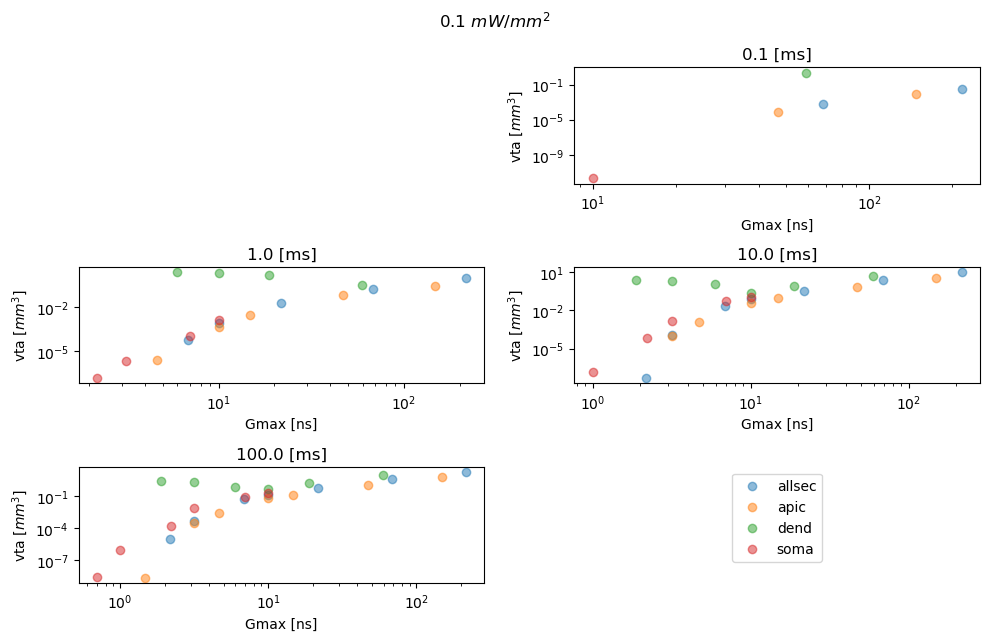

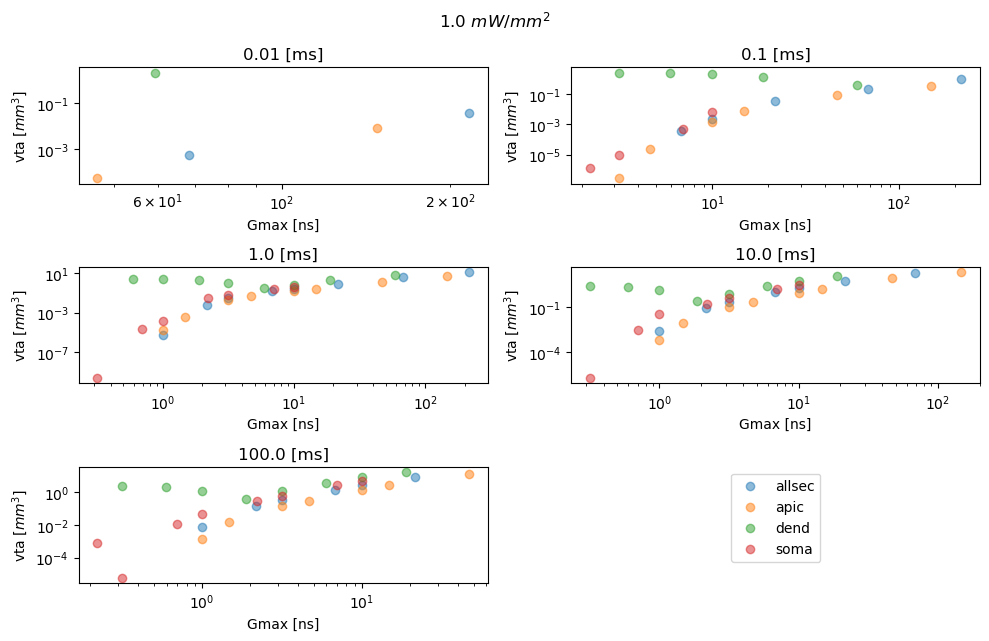

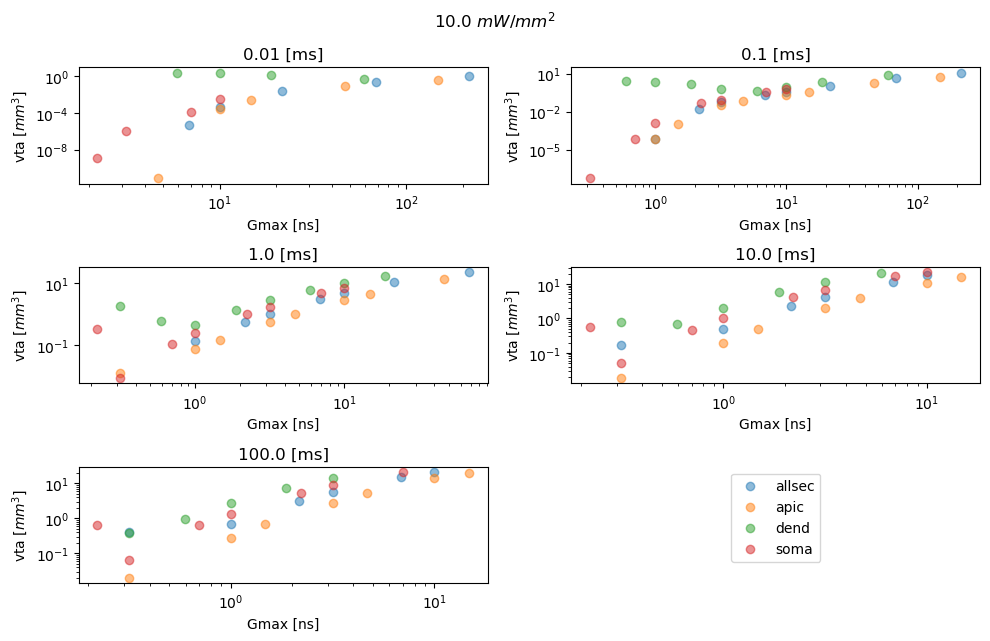

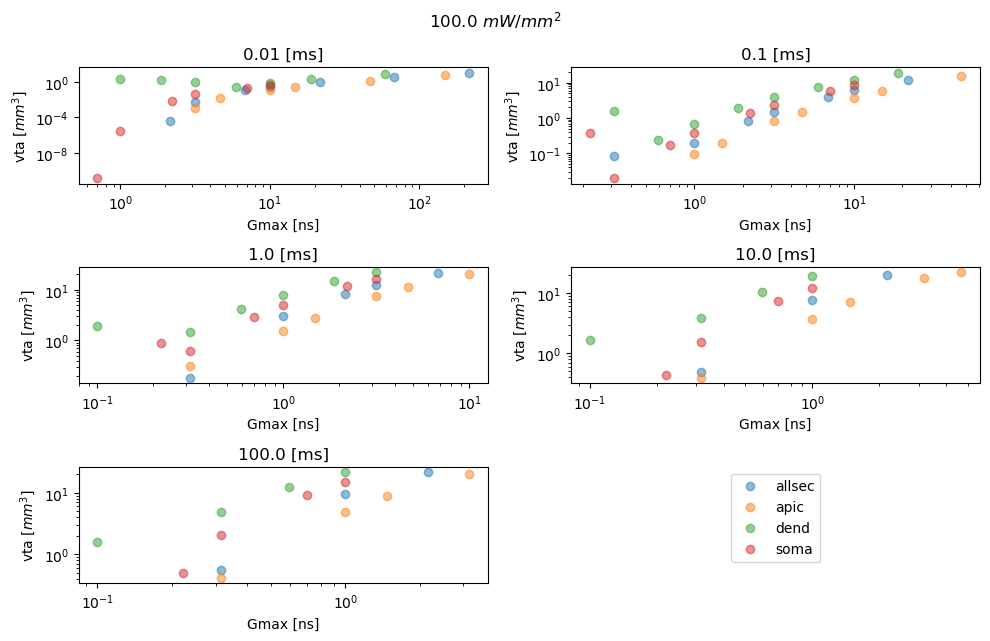

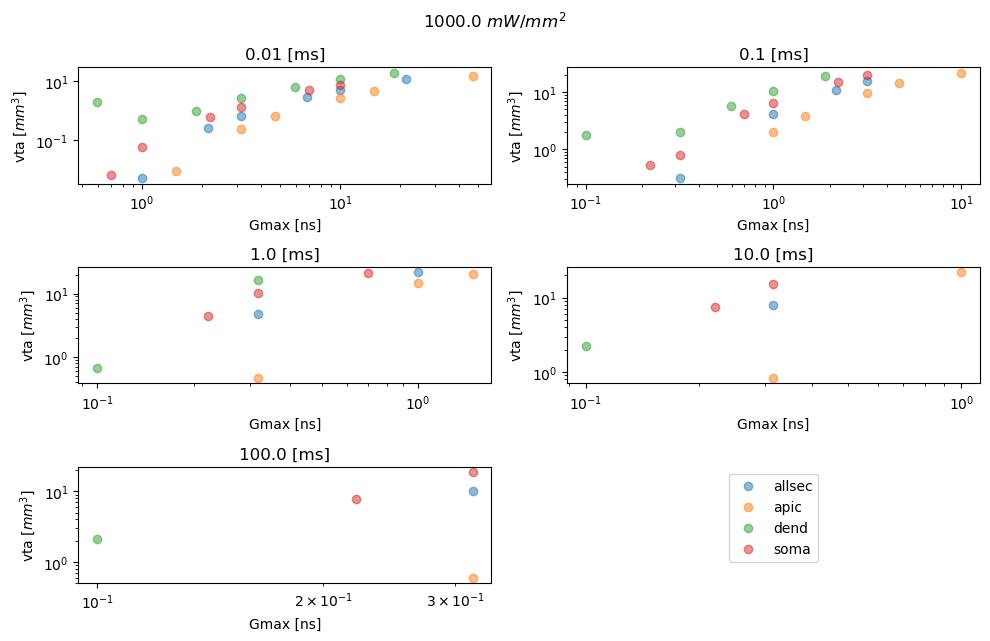

In [9]:
figsize = (10,6.5)
vta_thresh = (0.5*np.pi*4.5*1.8**2)
unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_df.columns}
myselection = {'nPulse':1}
intm_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,verbose=False,**myselection)]
mycolors = plt.get_cmap('tab10',10).colors
lvls = list(vta_df['level'].unique())
for lvl in lvls[:]:
    fig,axs = plt.subplots(3,2,tight_layout = True, figsize = figsize)
    figure_df = intm_df[selection_generator(intm_df,unique_values_columns_vta,level=lvl)]
    fig.suptitle(f'{lvl} $mW/mm^2$')
    for dur,ax in zip(unique_values_columns_vta['dur'],axs.ravel()):
        ax_df = figure_df[selection_generator(figure_df,unique_values_columns_vta,dur=dur)]
        any_not_nan = False
        for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
            sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,opsinlocations=ol)]
            y = np.array(sctr_df['vta'])
            x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
            y = np.where(y>vta_thresh,np.nan,y)
            if not np.all(np.isnan(y)):
                any_not_nan = True
            ax.scatter(x,y,None,color = clr,alpha=0.5)
        ax.set_xlabel('Gmax [ns]')
        ax.set_ylabel('vta $[mm^3]$')
        if any_not_nan:
            ax.set_title(f'{dur} [ms]')
            ax.set_yscale('log')
            ax.set_xscale('log')
        else:
            ax.axis('off')
    axs[-1,-1].axis('off')
    for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
        axs[-1,-1].scatter(np.nan,np.nan,None,color = clr,alpha=0.5,label=ol)
    axs[-1,-1].legend(ncol=1,loc='upper center')



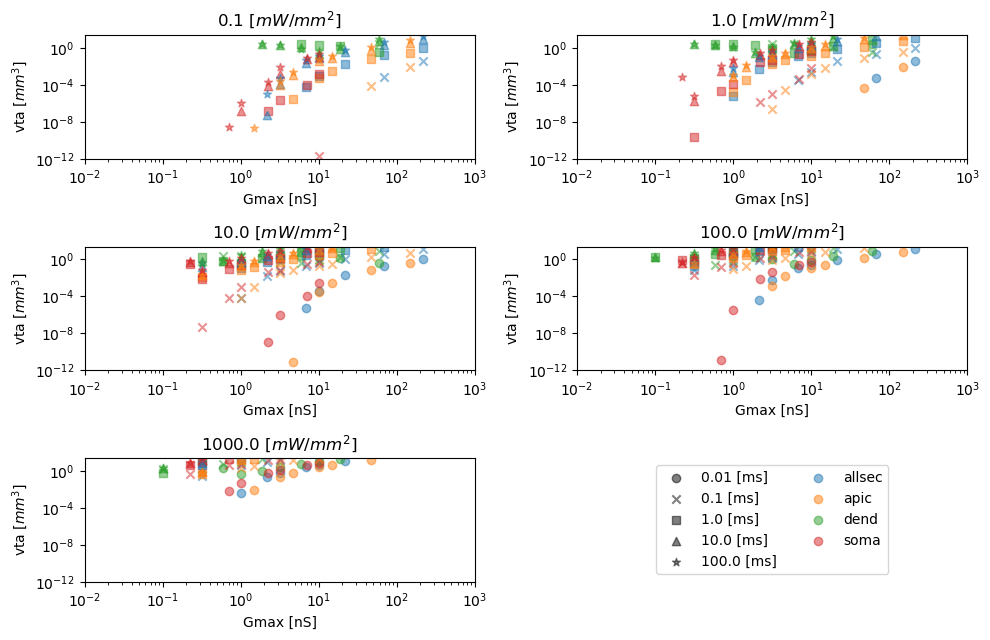

In [10]:
#x: gmax*dur
figsize = (10,6.5)
vta_thresh = (0.5*np.pi*4.5*1.8**2)
unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_df.columns}
myselection = {'nPulse':1}
intm_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,verbose=False,**myselection)]
mycolors = plt.get_cmap('tab10',10).colors
lvls = list(vta_df['level'].unique())
markers = ['o','x','s','^','*']


fig,axs = plt.subplots(3,2,tight_layout = True, figsize = figsize)
axs = axs.ravel()
for lvl,ax in zip(lvls,axs):
    ax_df = intm_df[selection_generator(intm_df,unique_values_columns_vta,level=lvl)]
    any_not_nan = False
    for dur,mrkr in zip(unique_values_columns_vta['dur'],markers):
        for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
            sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,opsinlocations=ol,dur=dur)]

            y = np.array(sctr_df['vta'])
            x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
            y = np.where(y>vta_thresh,np.nan,y)
            if not np.all(np.isnan(y)):
                any_not_nan = True
            ax.scatter(x,y,None,color = clr,alpha=0.5,marker=mrkr)
    ax.set_xlabel('Gmax [nS]')
    ax.set_ylabel('vta $[mm^3]$')
    ax.set_xlim([1e-2,1e3])
    ax.set_ylim([1e-12,vta_thresh*1.1])
    if any_not_nan:
        ax.set_title(f'{lvl} [$mW/mm^2$]')
        ax.set_yscale('log')
        ax.set_xscale('log')
    else:
        ax.axis('off')
axs[-1].axis('off')


for dur,mrkr in zip(unique_values_columns_vta['dur'],markers):
    axs[-1].scatter(np.nan,np.nan,None,color = 'k',alpha=0.5,label=f'{dur} [ms]',marker=mrkr)
for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
    axs[-1].scatter(np.nan,np.nan,None,color = clr,alpha=0.5,label=ol)
axs[-1].legend(ncol=2,loc='upper center')

0.1
{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed': 1638360000.0, 'celsius': 34, 'dt': 0.025, 'opsinmech': 'chr2h134r', 'distribution_method': '3d', 'opsinlocations': 'dend', 'field': 'Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10', 'dc': 1.0, 'nPulse': 1, 'prf': 0.1, 'Gmax': 0.1}

0.3162277660168379
{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed': 1638360000.0, 'celsius': 34, 'dt': 0.025, 'opsinmech': 'chr2h134r', 'distribution_method': '3d', 'opsinlocations': 'dend', 'field': 'Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10', 'dc': 1.0, 'nPulse': 1, 'prf': 0.1, 'Gmax': 0.3162277660168379}

1.0
{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed': 1638360000.0, 'celsius': 34, 'dt': 0.025, 'opsinmech': 'chr2h134r', 'distribution_method': '3d', 'opsinlocations': 'dend', 'field': 'Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10', 'dc': 1.0, 'nPulse': 1, 'prf': 0.1, 'Gmax': 1.0}

3.1622776601683795
{'phi_0': 0, 'theta_0': -1.5707963267948966, 'psi_0': 0, 'seed'

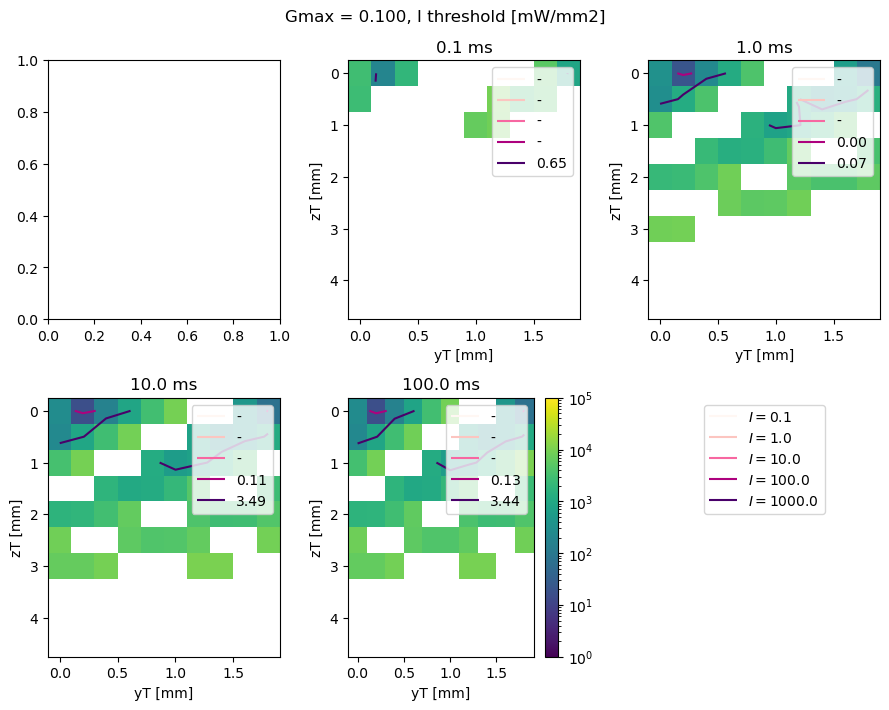

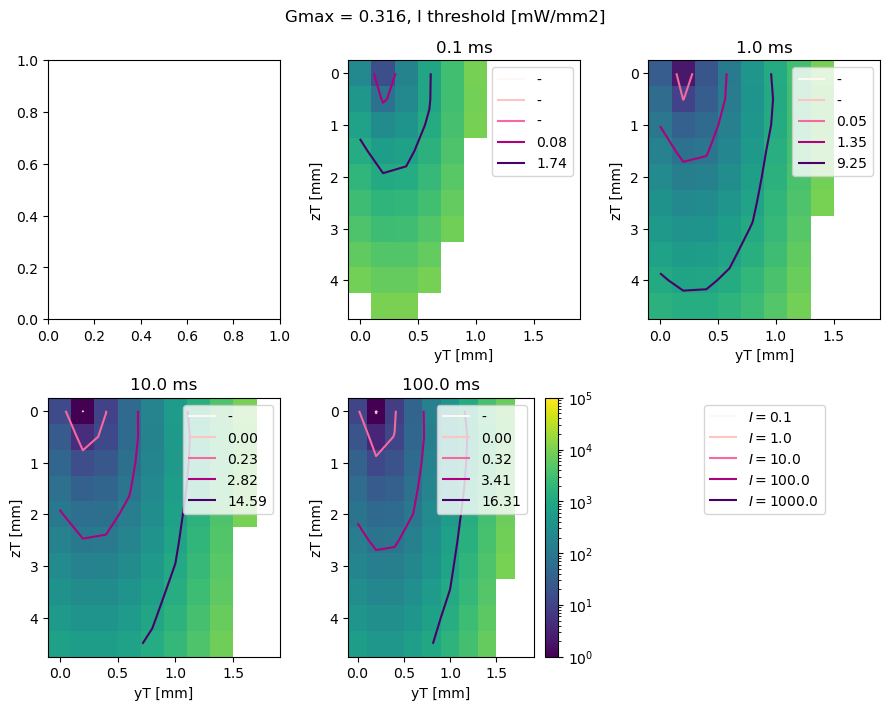

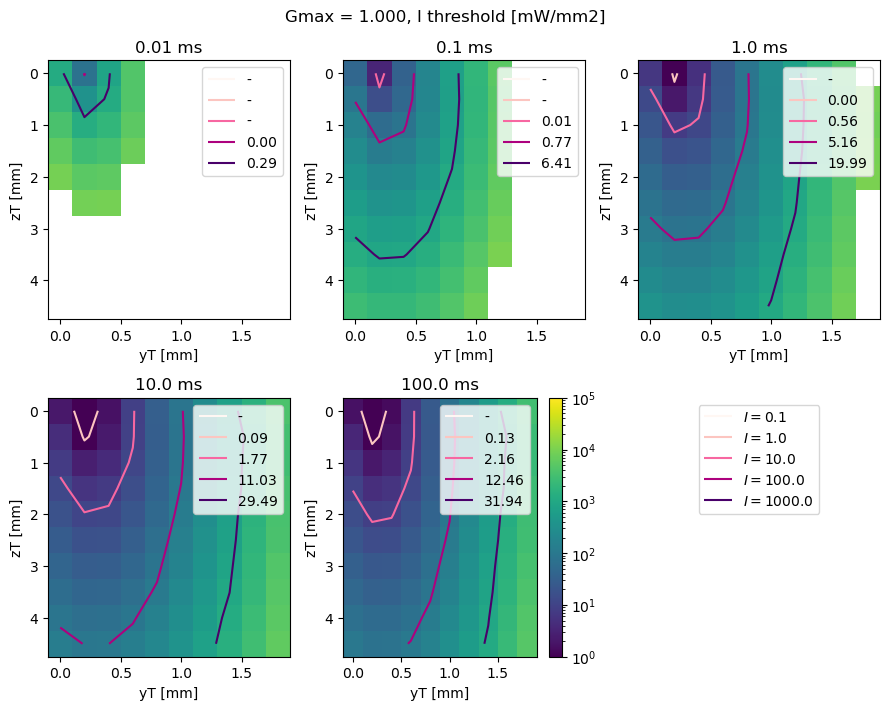

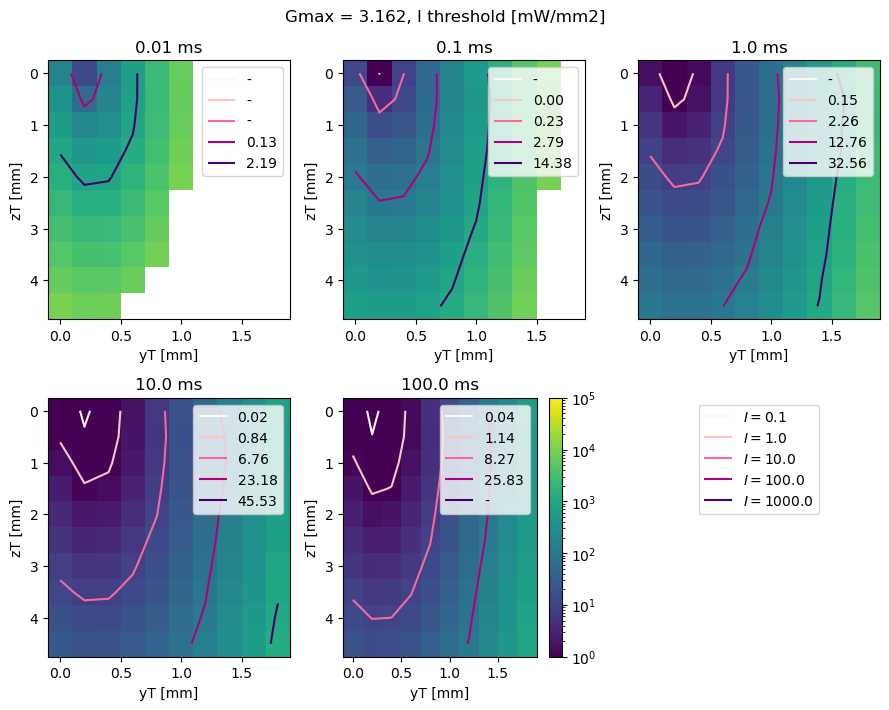

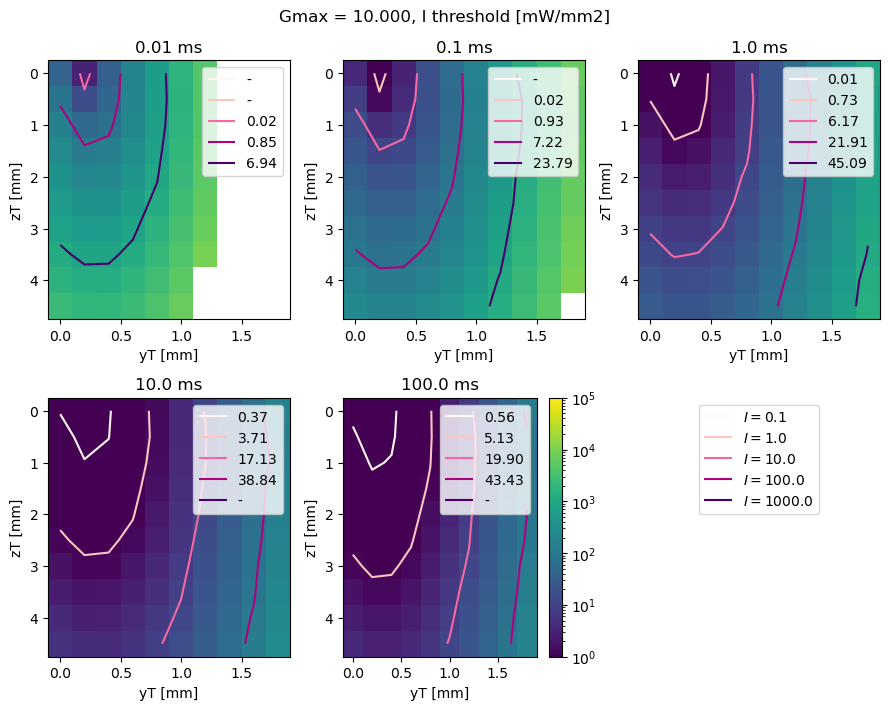

In [11]:
myselection_noGmax = {key:unique_values_columns_master[key][0] for key in [*cell_init_options,*settings_options,*opsin_options,*field_options] if not key in ['Gmax','distribution']}
myselection_noGmax['opsinlocations'] = 'dend'
intm_df = master_df[selection_generator(master_df,unique_values_columns_master,verbose=False,**myselection_noGmax)]
gmaxs = list(intm_df['Gmax'].unique())
print_upscale = False
nan_tolerance_percentage = 0.95

for gmax in gmaxs[5:]:
    print(gmax)
    myselection = {**myselection_noGmax, 'Gmax': gmax}
    single_config_df = master_df[selection_generator(master_df,unique_values_columns_master,verbose=False,**myselection)].reset_index(drop=True)
    print(myselection)

    Imin = np.min(single_config_df['amp'])
    Imax = 1e5#np.max(single_config_df['amp'])
    levels = np.logspace(-1,3,5)
    norm_log = cm.colors.LogNorm(vmax=Imax, vmin=1)
    norm_log_cntr = cm.colors.LogNorm(vmax=levels[-1], vmin=levels[0])


    udurs = list(single_config_df['dur'].unique())
    fig,axs = plt.subplots(int(len(udurs)/3+0.67),3,tight_layout = True,figsize=np.array([10,8])*0.9)
    all_axs = axs.ravel()
    if print_upscale:
        fig_up,axs_up = plt.subplots(int(len(udurs)/3+0.67),3,tight_layout = True,figsize=np.array([10,8])*0.9)
        all_axs = zip(axs.ravel(),axs_up.ravel())

    for dur,ax in zip(udurs,all_axs):
        if print_upscale:
            ax_up = ax[1]
            ax = ax[0]

        intm_df = single_config_df[single_config_df['dur']==dur]
        if not np.all(np.isnan(intm_df['amp'])):
            data_toplot = EcF.prepareDataforInterp(np.array((intm_df['y'],intm_df['z'],intm_df['amp'])).T/1000,'ninterp')
            yY, zZ = np.meshgrid(np.linspace(data_toplot[0].min(),data_toplot[0].max(),len(np.unique(data_toplot[0])),endpoint=True),np.linspace(data_toplot[1].min(),data_toplot[1].max(),len(np.unique(data_toplot[0])),endpoint=True))


            if sum(np.isnan(data_toplot[-1].flatten()))/len(data_toplot[-1].flatten()) < nan_tolerance_percentage:
                im,cntr,cb = EcF.slicePlot(data_toplot,ax,fig,plotGrid=(yY,zZ),structured=True, norm=norm_log,invert_yaxis=True,contour_kwargs={'norm':norm_log_cntr,'cmap':'RdPu','levels':levels})
                ax.set_xlabel('yT [mm]')
                ax.set_ylabel('zT [mm]')
                ax.set_title(f'{dur} ms')
                cb.remove()
                h, l = cntr.legend_elements("I")
                vta = VTA2D(yY,zZ,im.get_array().reshape(yY.shape),grid_order=EcF.checkGridOrder(yY.ravel(),zZ.ravel()),cntrs=cntr,cntr_order='rz',intensity = levels)
                ax.legend(h, [f'{x:0.2f}' if ~np.isnan(x) else '-' for x in vta],ncol=1,loc='upper right')

                if print_upscale:
                    yY_up, zZ_up = np.meshgrid(np.linspace(data_toplot[0].min(),data_toplot[0].max(),30,endpoint=True),np.linspace(data_toplot[1].min(),data_toplot[1].max(),30,endpoint=True))
                    im_up,cntr_up,cb_up = EcF.slicePlot(data_toplot,ax_up,fig_up,plotGrid=(yY_up,zZ_up),structured=True, norm=norm_log,invert_yaxis=True,contour_kwargs={'norm':norm_log_cntr,'cmap':'RdPu','levels':levels})
                    ax_up.set_xlabel('yT [mm]')
                    ax_up.set_ylabel('zT [mm]')
                    ax_up.set_title(f'{dur} ms')
                    cb_up.remove()
                    h_up, l_up = cntr_up.legend_elements("I")
                    #print('\nvta')
                    #print(EcF.checkGridOrder(yY.ravel(),zZ.ravel()))
                    vta_up = VTA2D(yY_up,zZ_up,im_up.get_array().reshape(yY_up.shape),grid_order=EcF.checkGridOrder(yY_up.ravel(),zZ_up.ravel()),cntrs=cntr_up,cntr_order='rz',intensity = levels)
                    ax_up.legend(h_up, [f'{x:0.2f}' if ~np.isnan(x) else '-' for x in vta_up],ncol=1,loc='upper right')
                    #print('\nvta2')
                    #print(EcF.checkGridOrder(yY.T.ravel(),zZ.T.ravel()))
                    #vta2 = VTA2D(yY.T,zZ.T,im.get_array().reshape(yY.shape).T,grid_order=EcF.checkGridOrder(yY.T.ravel(),zZ.T.ravel()),intensity = levels,close_plot=False)
                    #if np.any((np.array(vta)-np.array(vta2))>1e-10):
                    #    print(np.array(vta)-np.array(vta2))

    fig.suptitle(f'Gmax = {gmax:0.3f}, I threshold [mW/mm2]')
    h, l = cntr.legend_elements("I")
    axs[-1,-1].legend(h, l,ncol=1,loc='upper center')
    axs[-1,-1].axis('off')
    cb = fig.colorbar(im,ax=axs[-1,-2])
    if print_upscale:
        fig_up.suptitle(f'Upscaled via linear interpol')
        h_up, l_up = cntr_up.legend_elements("I")
        axs_up[-1,-1].legend(h_up, l_up,ncol=1,loc='upper center')
        axs_up[-1,-1].axis('off')
        cb_up = fig_up.colorbar(im_up,ax=axs_up[-1,-2])
    print()

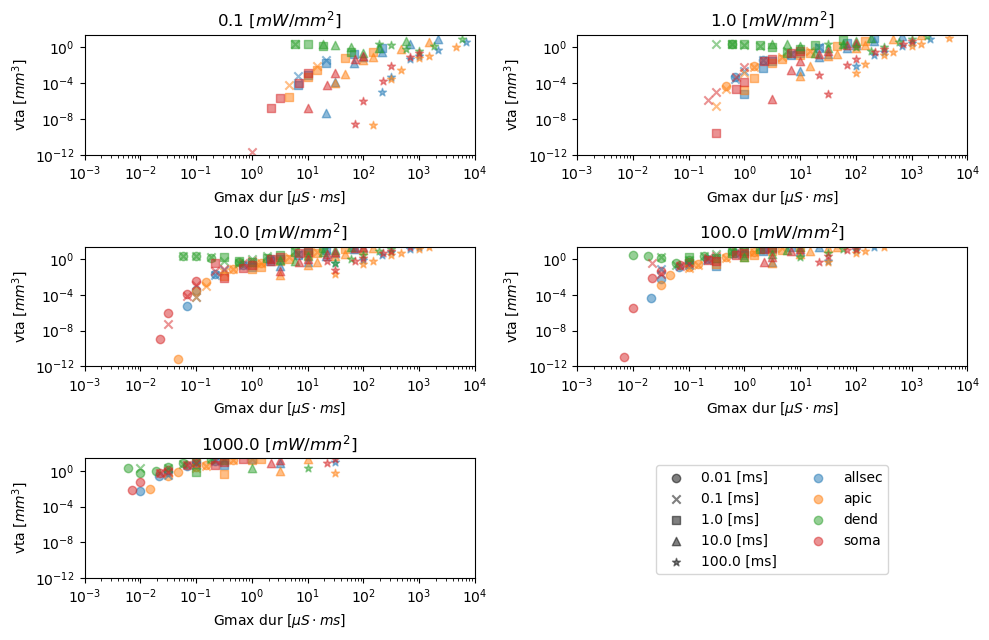

In [12]:
figsize = (10,6.5)
vta_thresh = (0.5*np.pi*4.5*1.8**2)
unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_df.columns}
myselection = {'nPulse':1}
intm_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,verbose=False,**myselection)]
mycolors = plt.get_cmap('tab10',10).colors
lvls = list(vta_df['level'].unique())
markers = ['o','x','s','^','*']


fig,axs = plt.subplots(3,2,tight_layout = True, figsize = figsize)
axs = axs.ravel()
for lvl,ax in zip(lvls,axs):
    ax_df = intm_df[selection_generator(intm_df,unique_values_columns_vta,level=lvl)]
    any_not_nan = False
    for dur,mrkr in zip(unique_values_columns_vta['dur'],markers):
        for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
            sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,opsinlocations=ol,dur=dur)]

            y = np.array(sctr_df['vta'])
            x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
            y = np.where(y>vta_thresh,np.nan,y)
            if not np.all(np.isnan(y)):
                any_not_nan = True
            ax.scatter(dur*x,y,None,color = clr,alpha=0.5,marker=mrkr)
    ax.set_xlabel('Gmax dur [$\mu S \cdot ms$]')
    ax.set_ylabel('vta $[mm^3]$')
    ax.set_xlim([1e-3,1e4])
    ax.set_ylim([1e-12,vta_thresh*1.1])
    if any_not_nan:
        ax.set_title(f'{lvl} [$mW/mm^2$]')
        ax.set_yscale('log')
        ax.set_xscale('log')
    else:
        ax.axis('off')
axs[-1].axis('off')


for dur,mrkr in zip(unique_values_columns_vta['dur'],markers):
    axs[-1].scatter(np.nan,np.nan,None,color = 'k',alpha=0.5,label=f'{dur} [ms]',marker=mrkr)
for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
    axs[-1].scatter(np.nan,np.nan,None,color = clr,alpha=0.5,label=ol)
axs[-1].legend(ncol=2,loc='upper center')

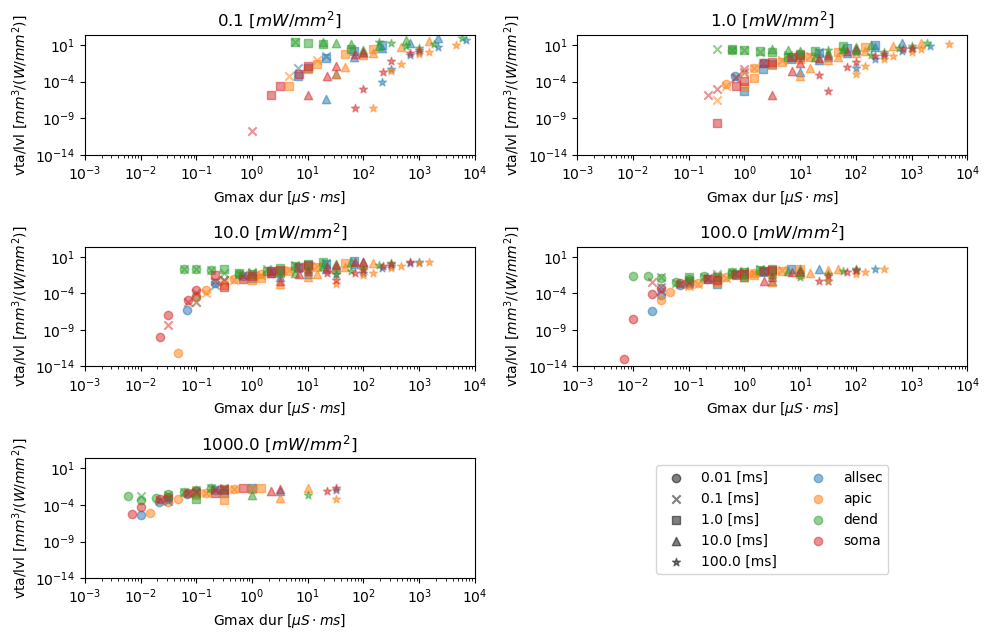

In [13]:
#x dur*Gmax vta/lvl
figsize = (10,6.5)
vta_thresh = (0.5*np.pi*4.5*1.8**2)
unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_df.columns}
myselection = {'nPulse':1}
intm_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,verbose=False,**myselection)]
mycolors = plt.get_cmap('tab10',10).colors
lvls = list(vta_df['level'].unique())
markers = ['o','x','s','^','*']


fig,axs = plt.subplots(3,2,tight_layout = True, figsize = figsize)
axs = axs.ravel()
for lvl,ax in zip(lvls,axs):
    ax_df = intm_df[selection_generator(intm_df,unique_values_columns_vta,level=lvl)]
    any_not_nan = False
    for dur,mrkr in zip(unique_values_columns_vta['dur'],markers):
        for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
            sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,opsinlocations=ol,dur=dur)]

            y = np.array(sctr_df['vta'])
            x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
            y = np.where(y>vta_thresh,np.nan,y)
            if not np.all(np.isnan(y)):
                any_not_nan = True
            ax.scatter(dur*x,y/lvl,None,color = clr,alpha=0.5,marker=mrkr)
    ax.set_xlabel('Gmax dur [$\mu S \cdot ms$]')
    ax.set_ylabel('vta/lvl $[mm^3/(W/mm^2)]$')
    ax.set_xlim([1e-3,1e4])
    ax.set_ylim([1e-14,vta_thresh*1.1/0.1])
    if any_not_nan:
        ax.set_title(f'{lvl} [$mW/mm^2$]')
        ax.set_yscale('log')
        ax.set_xscale('log')
    else:
        ax.axis('off')
axs[-1].axis('off')


for dur,mrkr in zip(unique_values_columns_vta['dur'],markers):
    axs[-1].scatter(np.nan,np.nan,None,color = 'k',alpha=0.5,label=f'{dur} [ms]',marker=mrkr)
for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
    axs[-1].scatter(np.nan,np.nan,None,color = clr,alpha=0.5,label=ol)
axs[-1].legend(ncol=2,loc='upper center')

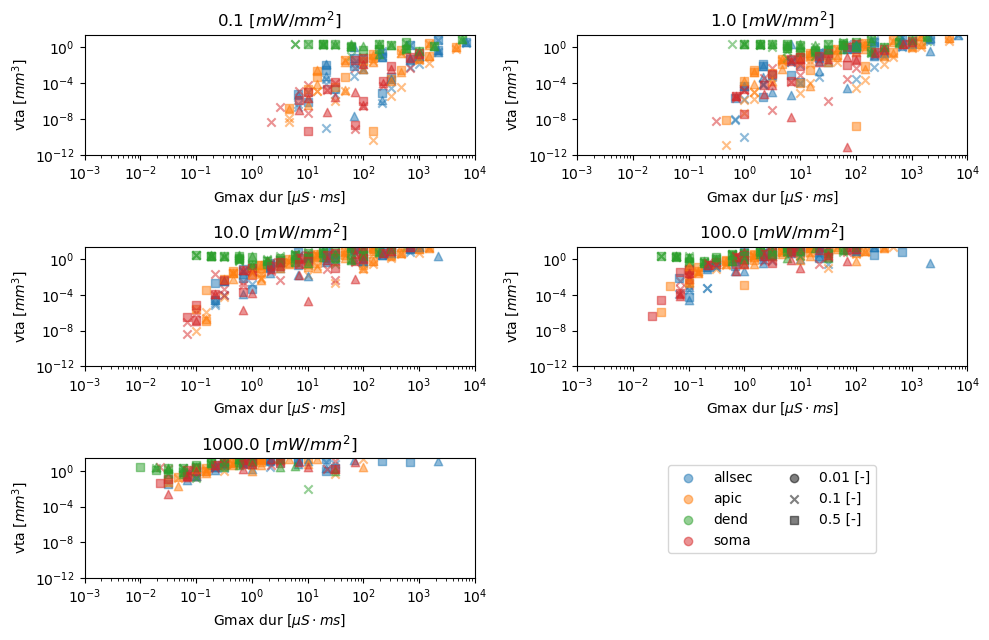

In [14]:
figsize = (10,6.5)
vta_thresh = (0.5*np.pi*4.5*1.8**2)
unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_df.columns}
myselection = {'nPulse':2}
intm_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,verbose=False,**myselection)]
mycolors = plt.get_cmap('tab10',10).colors
lvls = list(vta_df['level'].unique())
markers = ['o','x','s','^','*']


fig,axs = plt.subplots(3,2,tight_layout = True, figsize = figsize)
axs = axs.ravel()
for lvl,ax in zip(lvls,axs):
    ax_df = intm_df[selection_generator(intm_df,unique_values_columns_vta,level=lvl)]
    any_not_nan = False
    for dur in unique_values_columns_vta['dur']:
        for dc,mrkr in zip(unique_values_columns_vta['dc'],markers):
            for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
                sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,opsinlocations=ol,dur=dur,dc=dc)]

                y = np.array(sctr_df['vta'])
                x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
                y = np.where(y>vta_thresh,np.nan,y)
                if not np.all(np.isnan(y)):
                    any_not_nan = True
                ax.scatter(dur*x,y,None,color = clr,alpha=0.5,marker=mrkr)
    ax.set_xlabel('Gmax dur [$\mu S \cdot ms$]')
    ax.set_ylabel('vta $[mm^3]$')
    ax.set_xlim([1e-3,1e4])
    ax.set_ylim([1e-12,vta_thresh*1.1])
    if any_not_nan:
        ax.set_title(f'{lvl} [$mW/mm^2$]')
        ax.set_yscale('log')
        ax.set_xscale('log')
    else:
        ax.axis('off')
axs[-1].axis('off')


for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
    axs[-1].scatter(np.nan,np.nan,None,color = clr,alpha=0.5,label=ol)
for dc,mrkr in zip(intm_df['dc'].unique(),markers):
    axs[-1].scatter(np.nan,np.nan,None,color = 'k',alpha=0.5,label=f'{dc} [-]',marker=mrkr)

axs[-1].legend(ncol=2,loc='upper center')

In [15]:
intm_df[['vta','dur','level','Gmax','dc','nPulse','prf']].head(200)

,vta,dur,level,Gmax,dc,nPulse,prf
250,NaN,0.01,0.1,2.160768,0.01,2,0.001
251,NaN,0.01,1.0,2.160768,0.01,2,0.001
252,NaN,0.01,10.0,2.160768,0.01,2,0.001
253,NaN,0.01,100.0,2.160768,0.01,2,0.001
254,NaN,0.01,1000.0,2.160768,0.01,2,0.001
...,...,...,...,...,...,...,...
445,NaN,100.00,0.1,0.100000,0.01,2,0.001
446,NaN,100.00,1.0,0.100000,0.01,2,0.001
447,NaN,100.00,10.0,0.100000,0.01,2,0.001
448,NaN,100.00,100.0,0.100000,0.01,2,0.001


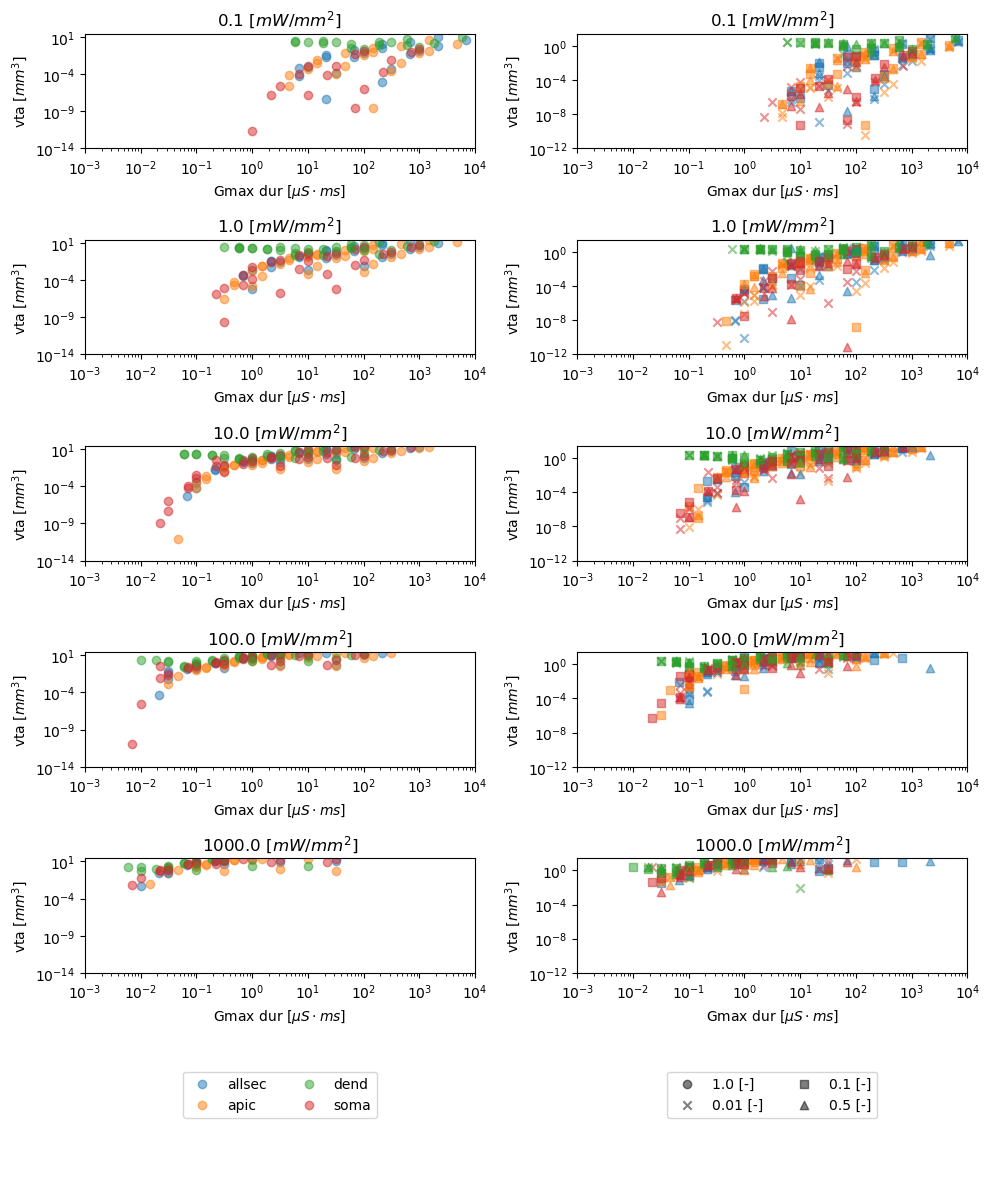

In [18]:
figsize = (10,12)
vta_thresh = (0.5*np.pi*4.5*1.8**2)
unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_df.columns}
mycolors = plt.get_cmap('tab10',10).colors
lvls = list(vta_df['level'].unique())
markers = ['o','x','s','^','*']


myselection = {'nPulse':1}
intm_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,verbose=False,**myselection)]
fig,axs = plt.subplots(6,2,tight_layout = True, figsize = figsize)
# 1 pulse
for lvl,ax in zip(lvls,axs[:,0]):
    ax_df = intm_df[selection_generator(intm_df,unique_values_columns_vta,level=lvl)]
    any_not_nan = False
    for dur in unique_values_columns_vta['dur']:
        for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
            sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,opsinlocations=ol,dur=dur)]

            y = np.array(sctr_df['vta'])
            x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
            y = np.where(y>vta_thresh,np.nan,y)
            if not np.all(np.isnan(y)):
                any_not_nan = True
            ax.scatter(dur*x,y,None,color = clr,alpha=0.5,marker='o')
    ax.set_xlabel('Gmax dur [$\mu S \cdot ms$]')
    ax.set_ylabel('vta $[mm^3]$')
    ax.set_xlim([1e-3,1e4])
    ax.set_ylim([1e-14,vta_thresh*1.1])
    if any_not_nan:
        ax.set_title(f'{lvl} [$mW/mm^2$]')
        ax.set_yscale('log')
        ax.set_xscale('log')
    else:
        ax.axis('off')
axs[-1,0].axis('off')



for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
    axs[-1,0].scatter(np.nan,np.nan,None,color = clr,alpha=0.5,label=ol,marker='o')
axs[-1,0].legend(ncol=2,loc='upper center')




myselection = {'nPulse':2}
intm_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,verbose=False,**myselection)]
# 2 pulses
for lvl,ax in zip(lvls,axs[:,1]):
    ax_df = intm_df[selection_generator(intm_df,unique_values_columns_vta,level=lvl)]
    any_not_nan = False
    for dur in unique_values_columns_vta['dur']:
        for dc,mrkr in zip(unique_values_columns_vta['dc'],markers):
            for ol,clr in zip(unique_values_columns_vta['opsinlocations'],mycolors):
                sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,opsinlocations=ol,dur=dur,dc=dc)]

                y = np.array(sctr_df['vta'])
                x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
                y = np.where(y>vta_thresh,np.nan,y)
                if not np.all(np.isnan(y)):
                    any_not_nan = True
                ax.scatter(dur*x,y,None,color = clr,alpha=0.5,marker=mrkr)
    ax.set_xlabel('Gmax dur [$\mu S \cdot ms$]')
    ax.set_ylabel('vta $[mm^3]$')
    ax.set_xlim([1e-3,1e4])
    ax.set_ylim([1e-12,vta_thresh*1.1])
    if any_not_nan:
        ax.set_title(f'{lvl} [$mW/mm^2$]')
        ax.set_yscale('log')
        ax.set_xscale('log')
    else:
        ax.axis('off')
axs[-1,-1].axis('off')


for dc,mrkr in zip(unique_values_columns_vta['dc'],markers):
    axs[-1,-1].scatter(np.nan,np.nan,None,color = 'k',alpha=0.5,label=f'{dc} [-]',marker=mrkr)

axs[-1,-1].legend(ncol=2,loc='upper center')

In [27]:
unique_values_columns_vta['dc']

array([1.  , 0.01, 0.1 , 0.5 ])

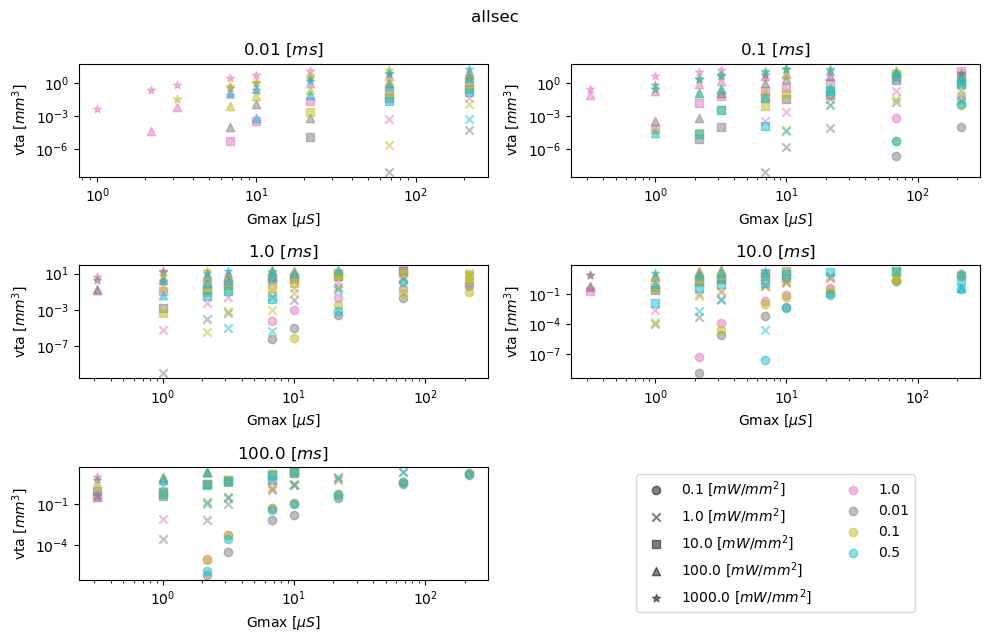

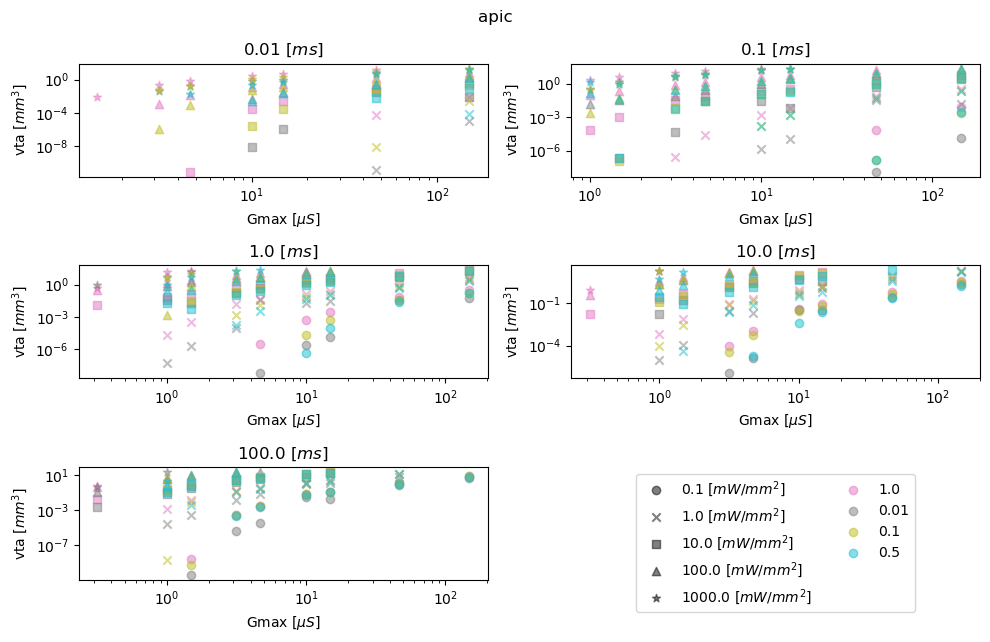

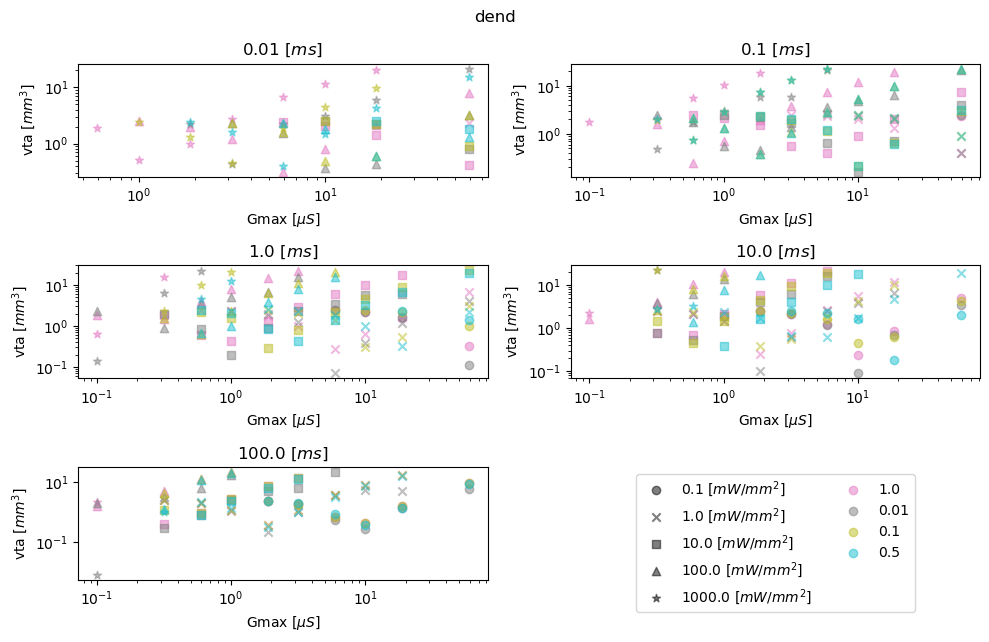

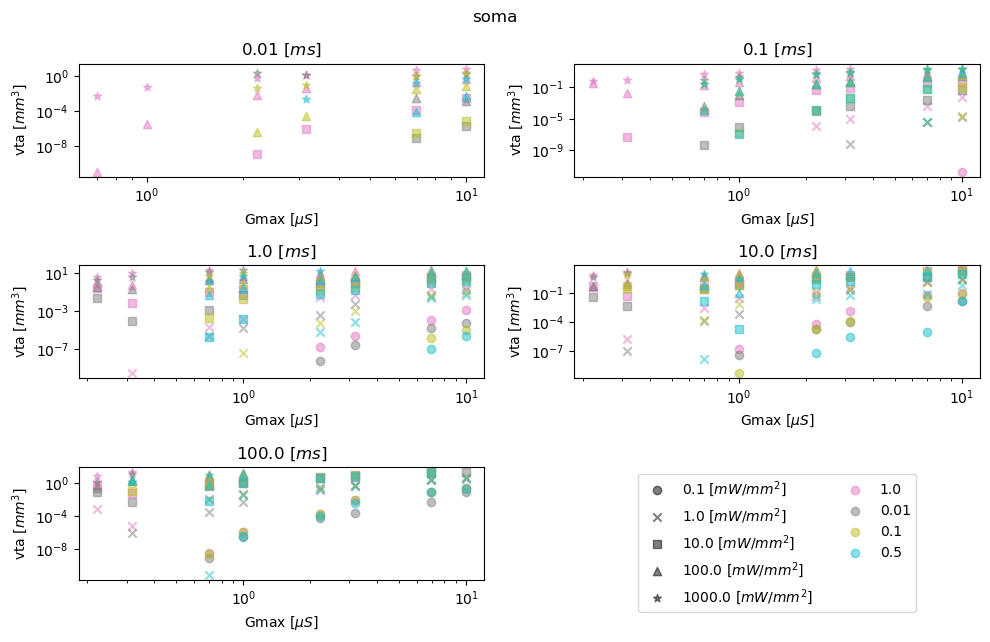

In [26]:
figsize = (10,6.5)
vta_thresh = (0.5*np.pi*4.5*1.8**2)
unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_df.columns}
mycolors = np.roll(plt.get_cmap('tab10',10).colors,4,axis=0)
markers = ['o','x','s','^','*']


for ol in unique_values_columns_vta['opsinlocations']:
    fig,axs = plt.subplots(3,2,tight_layout = True, figsize = figsize)
    figure_df = vta_df[selection_generator(vta_df,unique_values_columns_vta,opsinlocations=ol)]
    fig.suptitle(f'{ol}')
    for dur,ax in zip(unique_values_columns_vta['dur'],axs.ravel()):
        ax_df = figure_df[selection_generator(figure_df,unique_values_columns_vta,dur=dur)]
        any_not_nan = False
        for dc,clr in zip(unique_values_columns_vta['dc'],mycolors):
            for lvl,mrkr in zip(unique_values_columns_vta['level'],markers):
                sctr_df = ax_df[selection_generator(ax_df,unique_values_columns_vta,dc=dc,level=lvl)]
                y = np.array(sctr_df['vta'])
                x = np.where(y>vta_thresh,np.nan,np.array(sctr_df['Gmax']))
                y = np.where(y>vta_thresh,np.nan,y)
                if not np.all(np.isnan(y)):
                    any_not_nan = True
                ax.scatter(x,y,None,color = clr,marker = mrkr, alpha=0.5)
        ax.set_xlabel('Gmax [$\mu S$]')
        ax.set_ylabel('vta $[mm^3]$')
        if any_not_nan:
            ax.set_title(f'{dur} [$ms$]')
            ax.set_yscale('log')
            ax.set_xscale('log')
        else:
            ax.axis('off')
    axs[-1,-1].axis('off')
    for lvl,mrkr in zip(unique_values_columns_vta['level'],markers):
        axs[-1,-1].scatter(np.nan,np.nan,None,color = 'k',marker=mrkr,alpha=0.5,label=f'{lvl} [$mW/mm^2$]')
    for dc,clr in zip(unique_values_columns_vta['dc'],mycolors):
        axs[-1,-1].scatter(np.nan,np.nan,None,color = clr,alpha=0.5,label=str(dc))

    axs[-1,-1].legend(ncol=2,loc='upper center')